In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128
Receiving objects: 100% (131/131), 1.13 MiB | 22.26 MiB/s, done.
Resolving deltas: 100% (57/57), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 3.2 MB/s eta 0:00:00


In [2]:
!ls /content/stylegan2-ada-pytorch/

calc_metrics.py  Dockerfile	generate.py  metrics	   style_mixing.py  train.py
dataset_tool.py  docker_run.sh	legacy.py    projector.py  torch_utils
dnnlib		 docs		LICENSE.txt  README.md	   training


In [3]:
!python /content/stylegan2-ada-pytorch/generate.py \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl \
  --outdir=/content/result  --seeds=6600-6610

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...
Generating image for seed 6600 (0/11) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 6601 (1/11) ...
Generating image for seed 6602 (2/11) ...
Generating image for seed 6603 (3/11) ...
Generating image for seed 6604 (4/11) ...
Generating image for seed 6605 (5/11) ...
Generating image for seed 6606 (6/11) ...
Generating image for seed 6607 (7/11) ...
Generating image for seed 6608 (8/11) ...
Generating image for seed 6609 (9/11) ...
Generating image for seed 6610 (10/11) ...


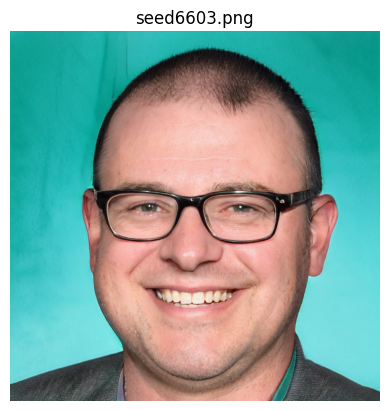

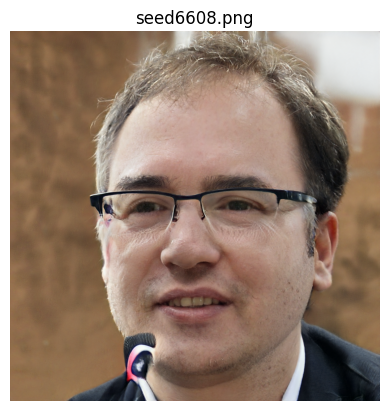

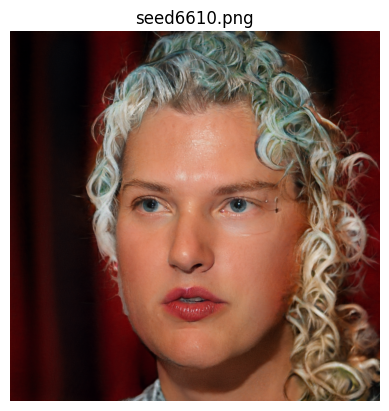

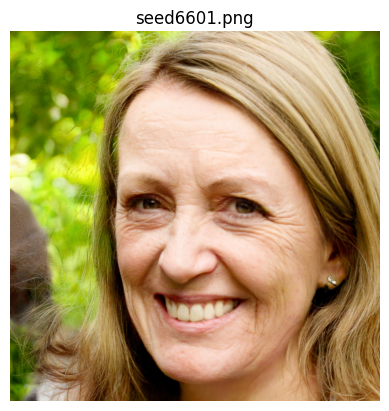

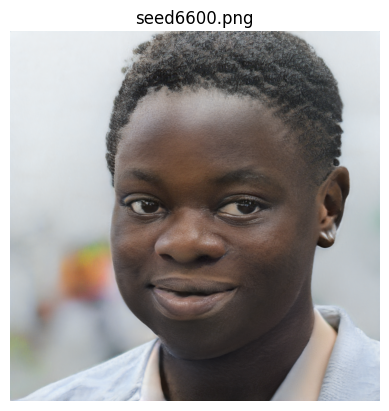

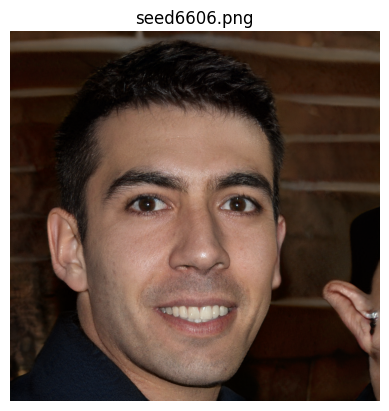

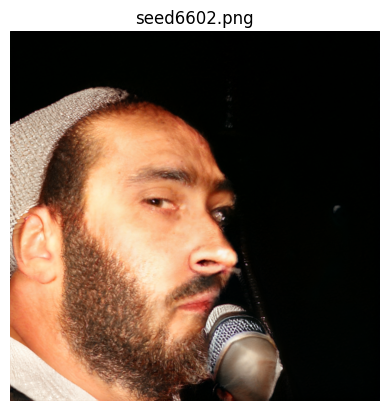

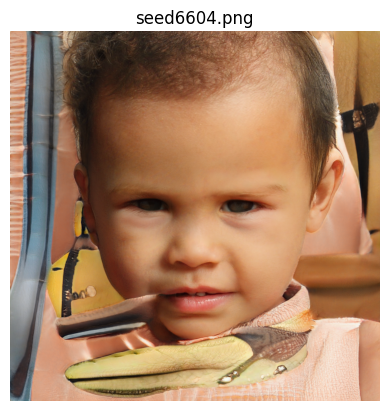

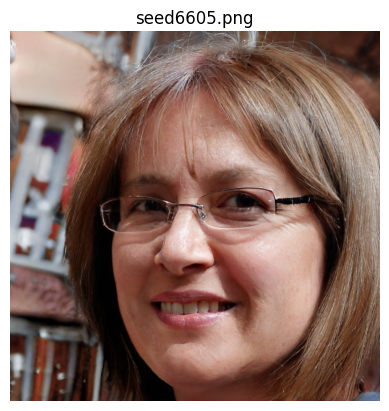

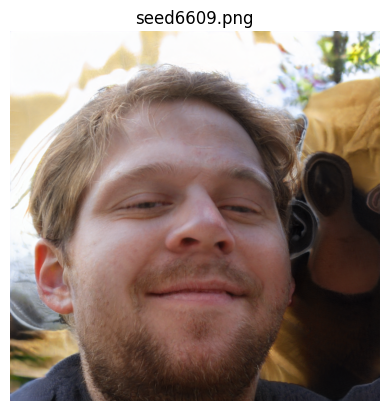

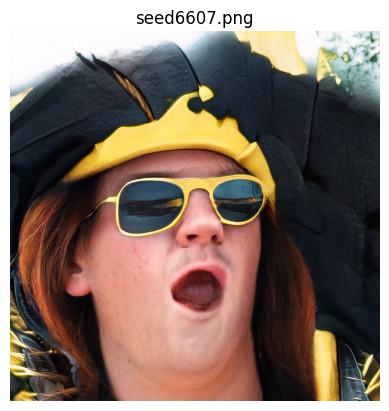

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

image_dir = "/content/result"
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

In [5]:
from PIL import Image
from tqdm.notebook import tqdm

file_paths = [
    '/content/SadineniLasyaSree_B21AI033.jpeg',
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg'
]

base_size = None
for file_path in tqdm(file_paths):
    img = Image.open(file_path)
    sz = img.size
    if base_size and sz != base_size:
        print(f"Inconsistent size: {file_path}")
    elif img.mode != 'RGB':
        print(f"Inconsistent color format: {file_path}")
    else:
        base_size = sz

  0%|          | 0/6 [00:00<?, ?it/s]

Inconsistent size: /content/1.jpg
Inconsistent size: /content/2.jpg
Inconsistent size: /content/3.jpg
Inconsistent size: /content/4.jpg
Inconsistent size: /content/5.jpg


In [6]:
from PIL import Image
import os
import zipfile

file_paths = [
    '/content/SadineniLasyaSree_B21AI033.jpeg',
    '/content/1.jpg',
    '/content/2.jpg',
    '/content/3.jpg',
    '/content/4.jpg',
    '/content/5.jpg'
]

# Define the target dimensions and color mode
target_size = (256, 256)
target_color_mode = 'RGB'

zip_filename = '/content/standardized_images.zip'
with zipfile.ZipFile(zip_filename, 'w') as zip_file:
    for file_path in file_paths:
        img = Image.open(file_path)
        img_resized = img.resize(target_size, Image.ANTIALIAS)
        img_standardized = img_resized.convert(target_color_mode)

        temp_file = '/content/temp_image.jpg'
        img_standardized.save(temp_file)

        zip_file.write(temp_file, os.path.basename(file_path))

os.remove(temp_file)

<ipython-input-6-2bb44358e7ca>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(target_size, Image.ANTIALIAS)


In [7]:
import zipfile
from PIL import Image
import io

zip_filename = '/content/standardized_images.zip'
with zipfile.ZipFile(zip_filename, 'r') as zip_file:
    for file_info in zip_file.infolist():
        with zip_file.open(file_info) as file:
            img_data = file.read()
            img = Image.open(io.BytesIO(img_data))
            img_size = img.size
            img_mode = img.mode
            print(f"File: {file_info.filename}")
            print(f"Dimensions: {img_size}, Color Mode: {img_mode}")

File: SadineniLasyaSree_B21AI033.jpeg
Dimensions: (256, 256), Color Mode: RGB
File: 1.jpg
Dimensions: (256, 256), Color Mode: RGB
File: 2.jpg
Dimensions: (256, 256), Color Mode: RGB
File: 3.jpg
Dimensions: (256, 256), Color Mode: RGB
File: 4.jpg
Dimensions: (256, 256), Color Mode: RGB
File: 5.jpg
Dimensions: (256, 256), Color Mode: RGB


In [8]:
import os

EXPERIMENTS = "/content/experiments"
DATA = "/content/standardized_images.zip"
SNAP = 10

cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py "\
  f"--snap {SNAP} --outdir {EXPERIMENTS} --data {DATA}"
os.system(cmd)


256

In [9]:
import os

EXPERIMENTS = "/content/experiments"
NETWORK = "network-snapshot-000100.pkl"
RESUME = os.path.join(EXPERIMENTS, \
                "00008-circuit-auto1-resumecustom", NETWORK)
DATA = "/content/standardized_images.zip"
SNAP = 10

cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py "\
  f"--snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 10,
  "network_snapshot_ticks": 10,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/standardized_images.zip",
    "use_labels": false,
    "max_size": 6,
    "xflip": false,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
    "channel_max

In [10]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2024-04-05 12:56:37--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 18.238.243.45, 18.238.243.57, 18.238.243.74, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|18.238.243.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   261MB/s    in 1.4s    

2024-04-05 12:56:38 (261 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [11]:
!pip install torch_utils

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7

In [12]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.


In [13]:
!wget --content-disposition https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/zip -O stylegan2.zip

--2024-04-05 12:58:03--  https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/zip
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 34.212.239.79, 35.167.170.225
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|34.212.239.79|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://files.ngc.nvidia.com/org/nvidia/team/research/models/stylegan2/versions/1/files.zip?Expires=1712325483&Signature=Wh~6MOAnlrC1g6EJJojIRdQZANS64UrbzTzniy41A29aVpwk38M5eNVkdrGszSlM9RJ4~NhWedGcihkWj8cqa5GuebdrIgr5iiaJgCq3CdBVEvF7yHSlxKRAELvGJQlHkPaBdfjMzKlfzt9sgHnddWhUjmPA-aTjLUb~7lg~O5O5q8vN3pzh8p7IIQhuGLHwmakRTnYRtqQURrpsc4W2mC3ZFaTggzt4IJE1WHfO2KrVGoucG0xX1t0At096Wrr7qPKjb6I~ssNF0b1dFy5IXoZ0pDeuMktuXdB9wgOAm4Iwu-RWBY0xworsUt-I3ciKthehyM6v3q6mpUeqPqCs1w__&Key-Pair-Id=KCX06E8E9L60W [following]
--2024-04-05 12:58:04--  https://files.ngc.nvidia.com/org/nvidia/team/research/models/stylegan2/versions/1/files.zip?Expires=1712325483&Signature=Wh~6MOAnlrC1g6EJJ

In [14]:
import zipfile
zip_file_path = "/content/stylegan2.zip"
extracted_dir_path = "/content/stylegan2/"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

extracted_files = zip_ref.namelist()
print("Extracted files/directories:")
for file in extracted_files:
    print(file)

Extracted files/directories:
stylegan2-afhqcat-512x512.pkl
stylegan2-afhqdog-512x512.pkl
stylegan2-afhqv2-512x512.pkl
stylegan2-afhqwild-512x512.pkl
stylegan2-brecahad-512x512.pkl
stylegan2-celebahq-256x256.pkl
stylegan2-cifar10-32x32.pkl
stylegan2-ffhq-1024x1024.pkl
stylegan2-ffhq-256x256.pkl
stylegan2-ffhq-512x512.pkl
stylegan2-ffhqu-1024x1024.pkl
stylegan2-ffhqu-256x256.pkl
stylegan2-lsundog-256x256.pkl
stylegan2-metfaces-1024x1024.pkl
stylegan2-metfacesu-1024x1024.pkl


In [15]:
from google.colab import files

files.view('/content')

<IPython.core.display.Javascript object>

In [16]:
%cd /content/stylegan2-ada-pytorch

import torch_utils
import pickle
import torch
import torch_utils
import dnnlib

/content/stylegan2-ada-pytorch


In [17]:
with open('/content/stylegan2/stylegan2-ffhq-1024x1024.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

In [18]:
z = torch.randn([1, G.z_dim]).cuda()
c = None
img = G(z, c)
print(img.shape)

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
torch.Size([1, 3, 1024, 1024])


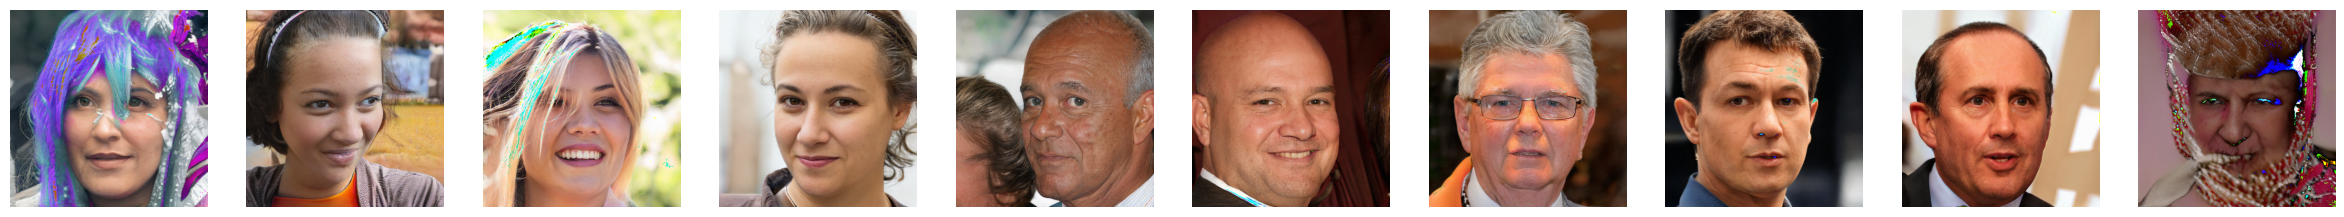

In [43]:
import torch
import matplotlib.pyplot as plt
from PIL import Image

num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
for i in range(num_images):
    z = torch.randn(1, G.z_dim).cuda()
    c = None
    with torch.no_grad():
        img = G(z, c)

    img_np = (img.squeeze().cpu().numpy().transpose(1, 2, 0) + 1) / 2.0
    image = Image.fromarray((img_np * 255).astype('uint8'))
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

Resized images:


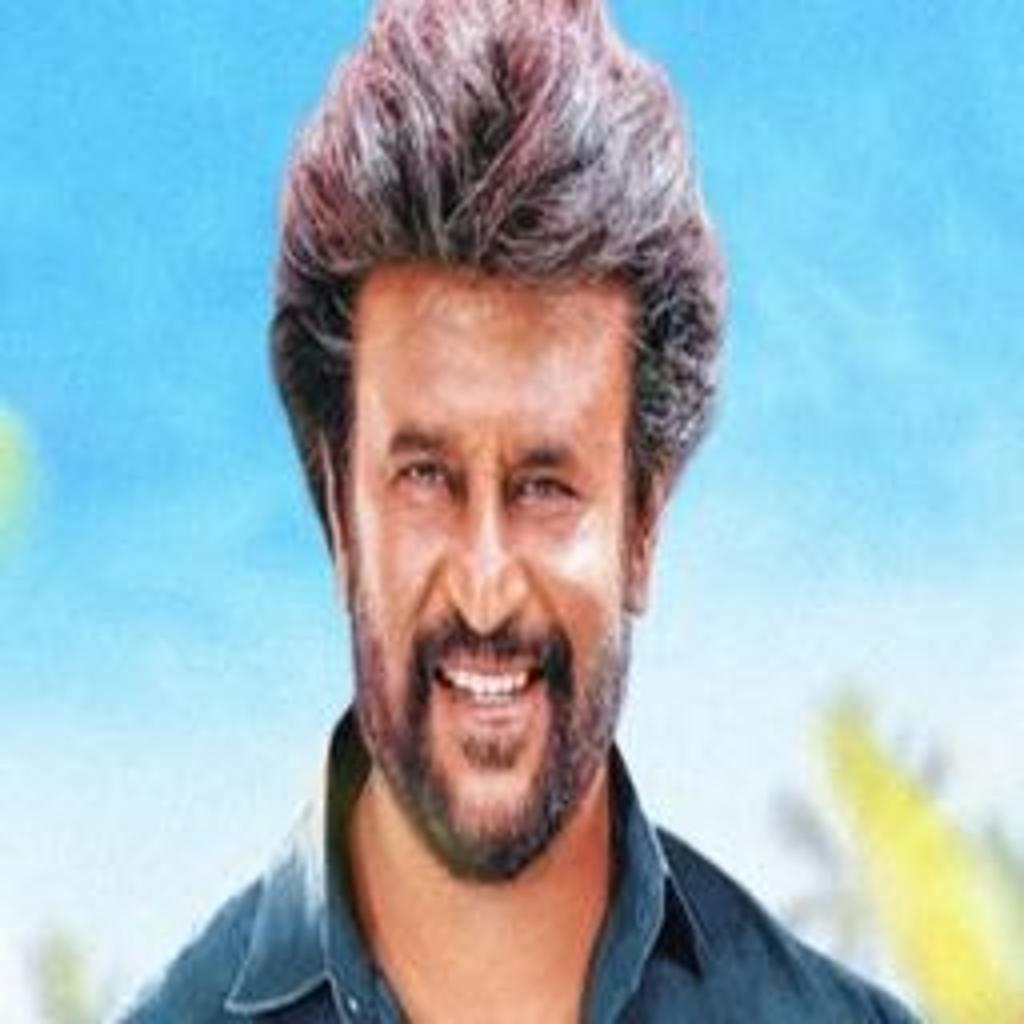

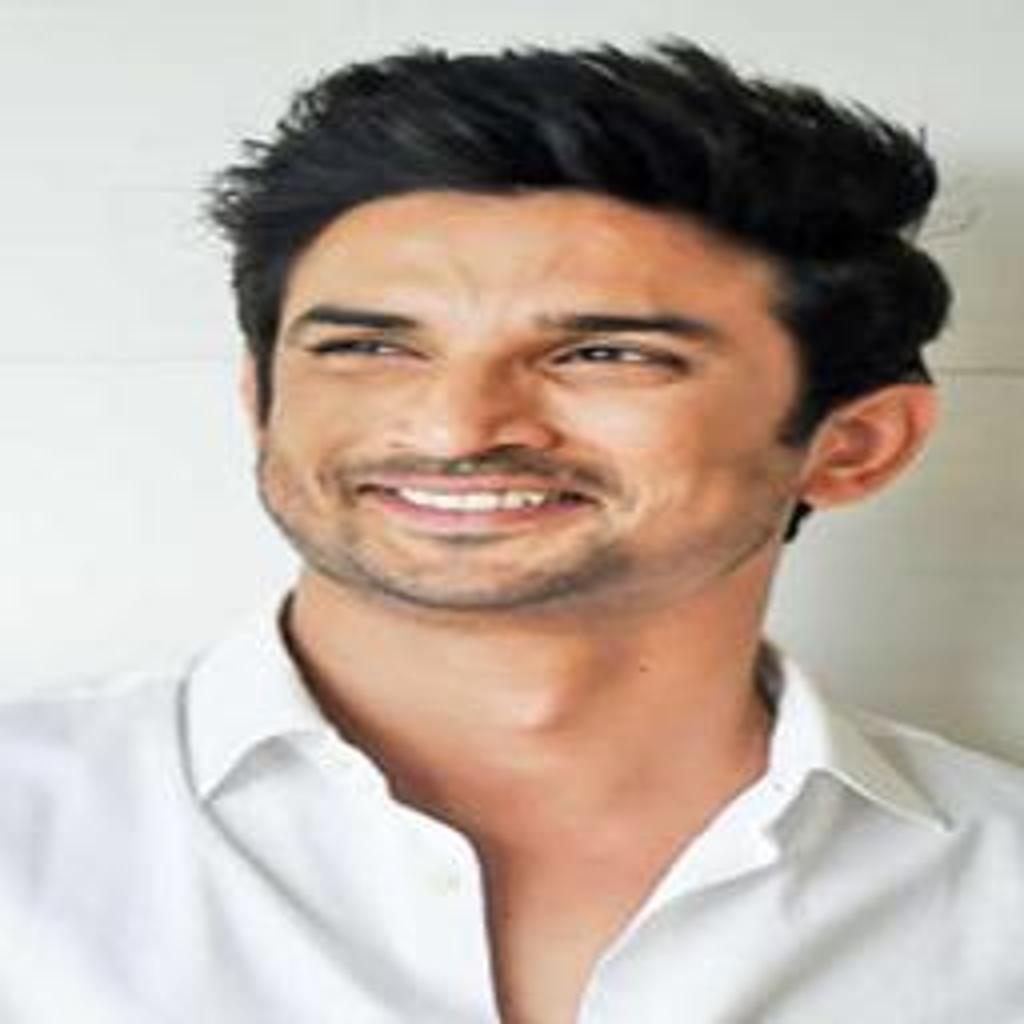

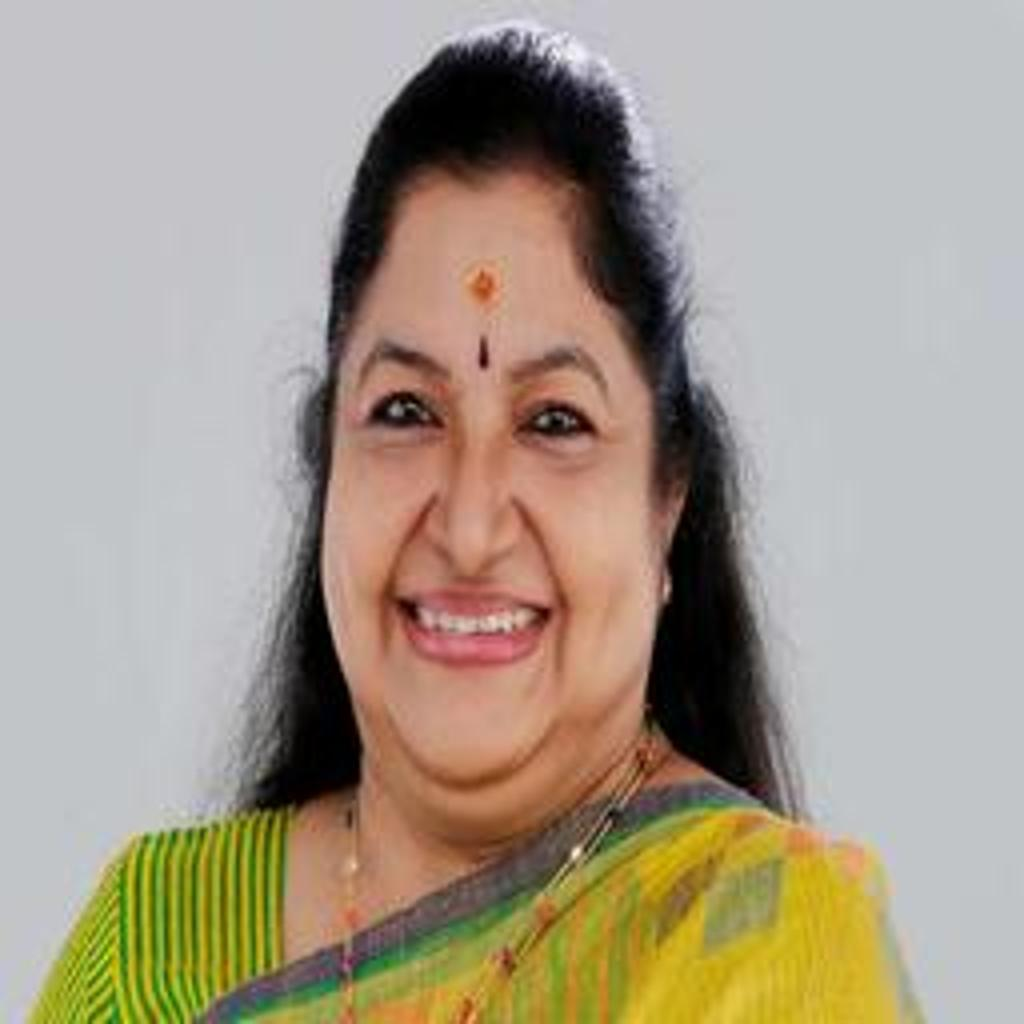

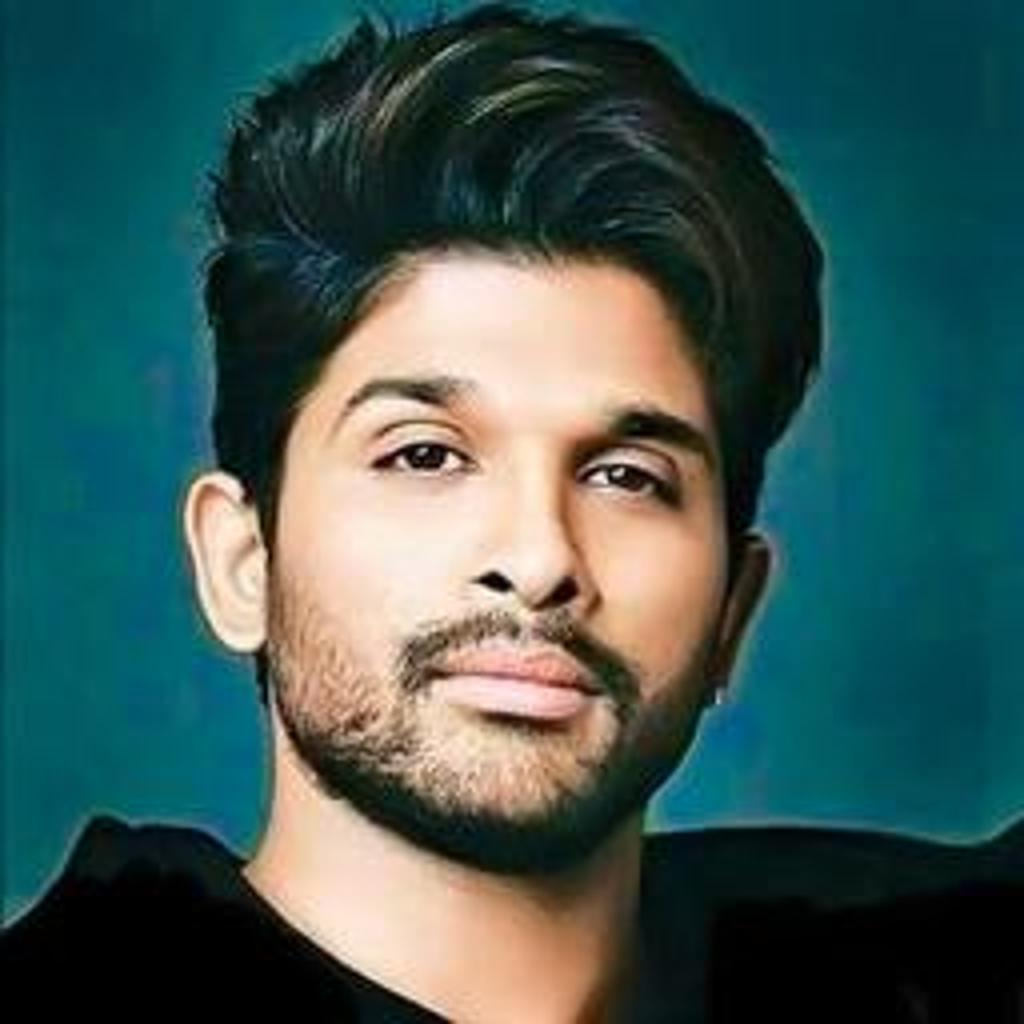

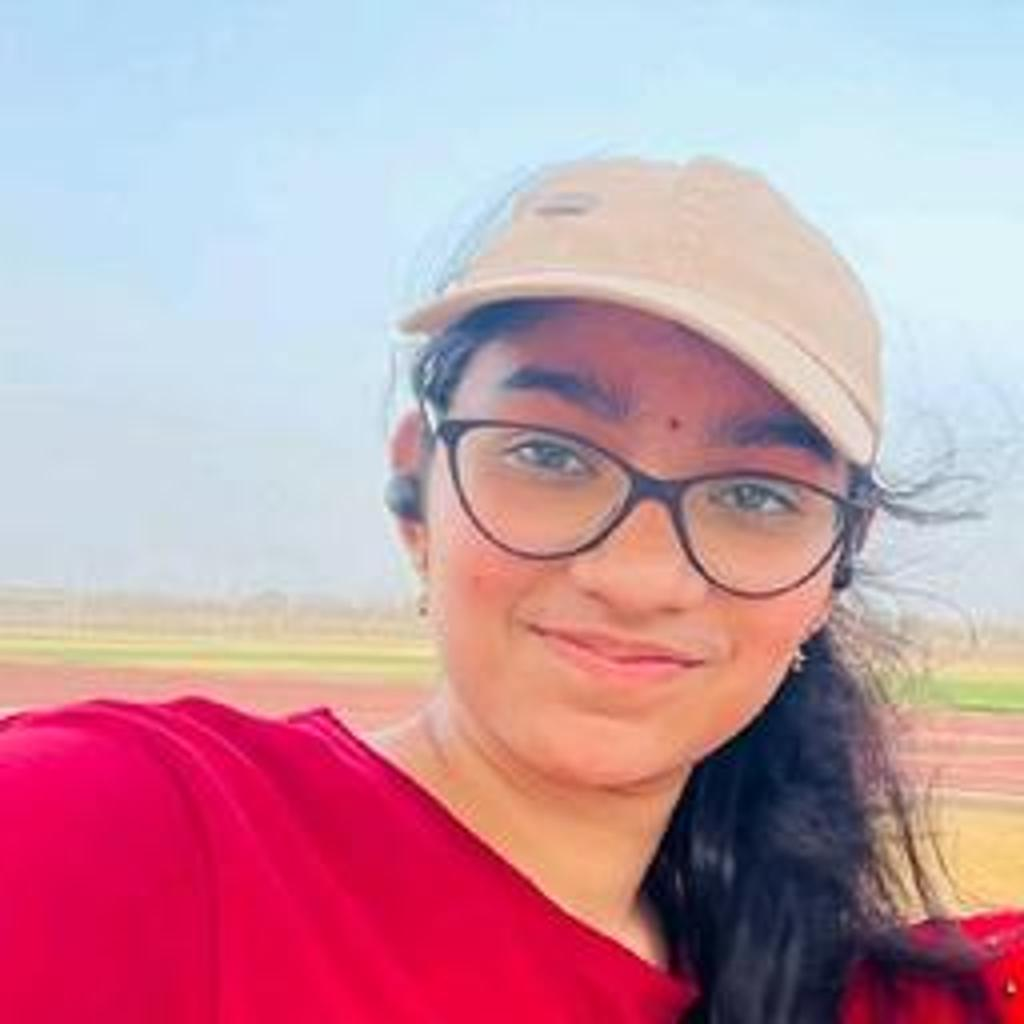

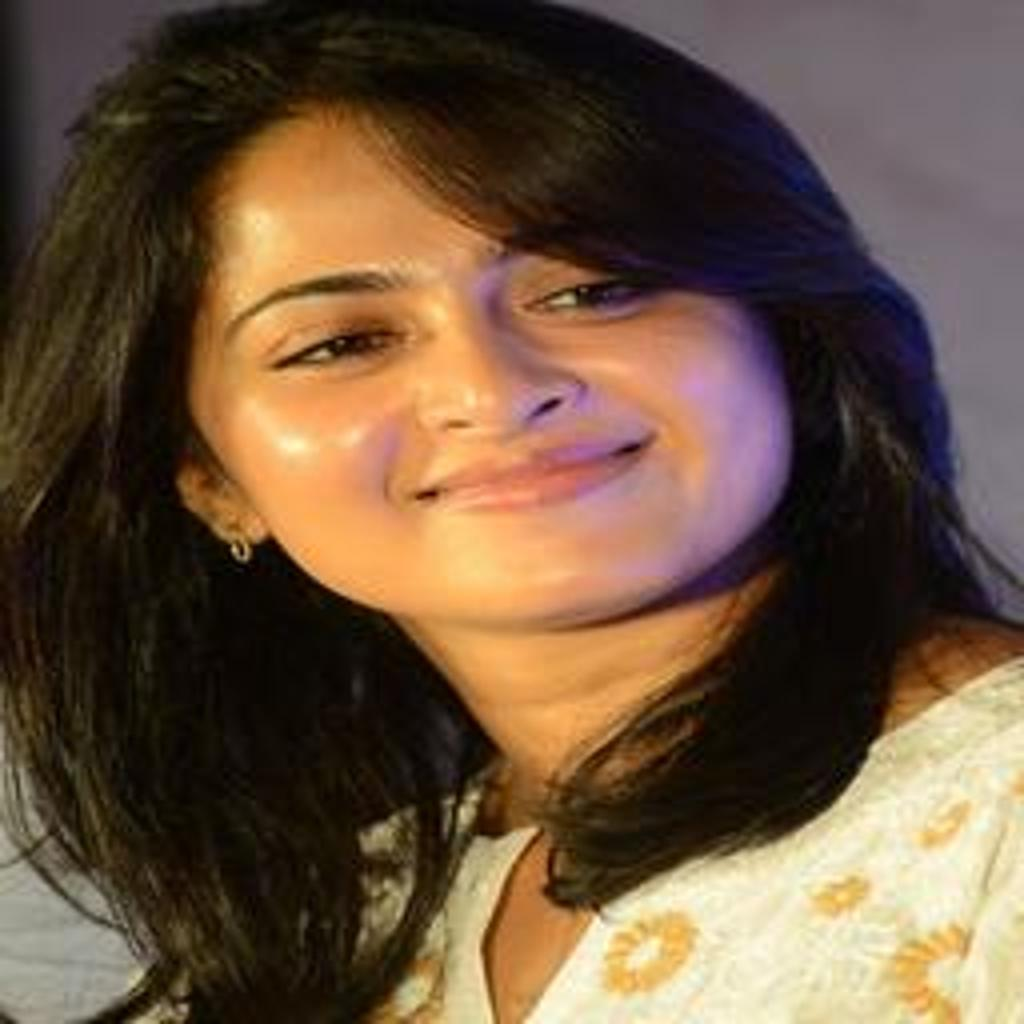

In [20]:
import os
from PIL import Image
import zipfile

zip_file_path = "/content/standardized_images.zip"
extracted_dir_path = "/content/archive_extracted"
resized_dir_path = "/content/archive_resized"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

os.makedirs(resized_dir_path, exist_ok=True)

resized_image_filenames = []
for filename in os.listdir(extracted_dir_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(extracted_dir_path, filename)
        img = Image.open(img_path)

        img_resized = img.resize((1024, 1024))
        resized_img_path = os.path.join(resized_dir_path, filename)
        img_resized.save(resized_img_path)
        resized_image_filenames.append(filename)

print("Resized images:")
for filename in resized_image_filenames:
    img_path = os.path.join(resized_dir_path, filename)
    img_resized = Image.open(img_path)
    display(img_resized)

In [21]:
target_paths = [os.path.join(resized_dir_path, filename) for filename in resized_image_filenames]

for target_path in target_paths:
    projector_command = f"!python projector.py --outdir=/content/projections/main --target={target_path} --network=/content/stylegan2-ffhq-1024x1024.pkl"
    os.system(projector_command)

In [22]:
!python /content/stylegan2-ada-pytorch/projector.py --outdir=/content/projections/my_img --target=/content/archive_resized/SadineniLasyaSree_B21AI033.jpeg\
    --network=/content/stylegan2/stylegan2-ffhq-1024x1024.pkl

Loading networks from "/content/stylegan2/stylegan2-ffhq-1024x1024.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.78 loss 24567.44
step    2/1000: dist 0.83 loss 27640.80
step    3/1000: dist 0.81 loss 27166.92
step    4/1000: dist 0.74 loss 26253.54
step    5/1000: dist 0.75 loss 24957.37
step    6/1000: dist 0.77 loss 23352.30
step    7/1000: dist 0.72 loss 21510.88
step    8/1000: dist 0.74 loss 19487.01
step    9/1000: dist 0.73 loss 17341.67
step   10/1000: dist 0.74 loss 15140.53
step   11/1000: dist 0.69 loss 12947.20
step   12/1000: dist 0.69 loss 10818.26
step   13/1000: dist 0.73 loss 8801.44
step   14/1000: dist 0.68 loss 6946.72
step   15/1000: dist 0.68 loss 5313.98
step   16/1000: dist 0.67 loss 3971.76
step   17/1000: dist 0.67 loss 2942.68
step   18/1000: dist 0.67 loss 2211.11
step   19/1000: dist 0.65 loss 1760.20
step   20/

In [23]:
!python /content/stylegan2-ada-pytorch/projector.py --outdir=/content/projections/img1 --target=/content/archive_resized/1.jpg\
    --network=/content/stylegan2/stylegan2-ffhq-1024x1024.pkl


Loading networks from "/content/stylegan2/stylegan2-ffhq-1024x1024.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.68 loss 24567.35
step    2/1000: dist 0.71 loss 27640.68
step    3/1000: dist 0.70 loss 27166.81
step    4/1000: dist 0.66 loss 26253.45
step    5/1000: dist 0.68 loss 24957.29
step    6/1000: dist 0.71 loss 23352.25
step    7/1000: dist 0.66 loss 21510.81
step    8/1000: dist 0.64 loss 19486.92
step    9/1000: dist 0.65 loss 17341.59
step   10/1000: dist 0.66 loss 15140.44
step   11/1000: dist 0.62 loss 12947.14
step   12/1000: dist 0.59 loss 10818.15
step   13/1000: dist 0.63 loss 8801.34
step   14/1000: dist 0.60 loss 6946.64
step   15/1000: dist 0.61 loss 5313.91
step   16/1000: dist 0.60 loss 3971.69
step   17/1000: dist 0.59 loss 2942.59
step   18/1000: dist 0.56 loss 2211.00
step   19/1000: dist 0.56 loss 1760.11
step   20/

In [24]:
!python /content/stylegan2-ada-pytorch/projector.py --outdir=/content/projections/img2 --target=/content/archive_resized/2.jpg\
    --network=/content/stylegan2/stylegan2-ffhq-1024x1024.pkl
!python /content/stylegan2-ada-pytorch/projector.py --outdir=/content/projections/img3 --target=/content/archive_resized/3.jpg\
    --network=/content/stylegan2/stylegan2-ffhq-1024x1024.pkl
!python /content/stylegan2-ada-pytorch/projector.py --outdir=/content/projections/img4 --target=/content/archive_resized/4.jpg\
    --network=/content/stylegan2/stylegan2-ffhq-1024x1024.pkl
!python /content/stylegan2-ada-pytorch/projector.py --outdir=/content/projections/img5 --target=/content/archive_resized/5.jpg\
    --network=/content/stylegan2/stylegan2-ffhq-1024x1024.pkl

Loading networks from "/content/stylegan2/stylegan2-ffhq-1024x1024.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.73 loss 24567.40
step    2/1000: dist 0.79 loss 27640.76
step    3/1000: dist 0.70 loss 27166.82
step    4/1000: dist 0.74 loss 26253.54
step    5/1000: dist 0.72 loss 24957.33
step    6/1000: dist 0.71 loss 23352.25
step    7/1000: dist 0.72 loss 21510.88
step    8/1000: dist 0.70 loss 19486.98
step    9/1000: dist 0.69 loss 17341.63
step   10/1000: dist 0.70 loss 15140.49
step   11/1000: dist 0.67 loss 12947.19
step   12/1000: dist 0.69 loss 10818.26
step   13/1000: dist 0.69 loss 8801.40
step   14/1000: dist 0.65 loss 6946.69
step   15/1000: dist 0.67 loss 5313.97
step   16/1000: dist 0.67 loss 3971.76
step   17/1000: dist 0.68 loss 2942.69
step   18/1000: dist 0.67 loss 2211.10
step   19/1000: dist 0.65 loss 1760.19
step   20/

In [44]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

# Load the StyleGAN2 generator (G) from the pretrained model file
model_path = "/content/stylegan2/stylegan2-ffhq-1024x1024.pkl"
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

with open(model_path, 'rb') as f:
    G = pickle.load(f)['G_ema'].to(device)  
    
your_face_path = "/content/projections/my_img/projected_w.npz"
your_face_w = np.load(your_face_path)['w']
your_face_w = torch.tensor(your_face_w).to(device)

friend_faces_paths = [
    "/content/projections/img1/projected_w.npz",
    "/content/projections/img2/projected_w.npz",
    "/content/projections/img3/projected_w.npz",
    "/content/projections/img4/projected_w.npz",
    "/content/projections/img5/projected_w.npz"
]

friend_faces_w = []
for face_path in friend_faces_paths:
    w = np.load(face_path)['w']
    w = torch.tensor(w).to(device)
    friend_faces_w.append(w)

In [ ]:
#Generate images by interpolating my face with the remaining 5 faces
generated_images = []

num_steps = 5 

for friend_w in friend_faces_w:
    for i in range(num_steps + 1):
        alpha = i / num_steps

        interpolated_code = (1 - alpha) * your_face_w + alpha * friend_w

        with torch.no_grad():
            generated_image = G.synthesis(interpolated_code.unsqueeze(0), noise_mode='const')
            generated_images.append(generated_image)

fig, axes = plt.subplots(len(generated_images) // num_steps, num_steps + 1, figsize=(15, 10))

for i, image in enumerate(generated_images):
    image_np = torchvision.transforms.ToPILImage()(image.squeeze(0).cpu() * 0.5 + 0.5)  # Denormalize and convert to PIL image
    row = i // num_steps
    col = i % (num_steps + 1)
    axes[row, col].imshow(image_np)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
